In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [2]:
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.linear_model import LogisticRegression, Lasso, Ridge
from sklearn.metrics import mean_squared_error, r2_score, root_mean_squared_error, mean_absolute_error
from sklearn.preprocessing import StandardScaler

Tasks To Do  
3 Part 1: Regression Task (California Housing)  
3.1 Task 1: Load and Split Dataset  
• Use the California Housing dataset from sklearn.datasets.  
• Split the dataset into **training (80%)** and **test (20%)** sets.  
This is How you can use inbuilt dataset from scikit learn.

In [3]:
from sklearn.datasets import fetch_california_housing, fetch_openml

X,y = fetch_openml(name="California_housing", version=1, as_frame=True, return_X_y=True)


df = X.copy()
df["median_house_value"]= y

df["AveRooms"] = df["total_rooms"] / df["households"]
df["AveBedrms"] = df["total_bedrooms"] / df["households"]
df["Awcocup"] = df["population"] / df["households"]


df = df[["median_income", "housing_median_age", "AveRooms", "AveBedrms", "population", "Awcocup", "latitude", "longitude", "median_house_value"]]

df.dropna(inplace=True)

X = df.drop("median_house_value", axis=1)
y = df["median_house_value"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

3.2 Task 2: Complete all the Task  
• Regression Task (California Housing):  
– Step 1: Baseline Model (No Regularization) Build a Linear Regression model without
any regularization.  
∗ Train the model on the training set.  
∗ Observe the coefficients of the model.  
∗ Compute the Mean Squared Error (MSE) on both training and test sets.  
∗ This step helps to understand how a simple linear model behaves on the dataset and serves as
a baseline for comparison.


In [4]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(X_train, y_train)

print("Coeff of the model: ", lr.coef_)

X_train_pred = lr.predict(X_train)
X_test_pred = lr.predict(X_test)

mse_train = mean_squared_error(y_train, X_train_pred)
mse_test = mean_squared_error(y_test, X_test_pred)

print("MSE on training set: ", mse_train)
print("MSE on test set: ", mse_test)

Coeff of the model:  [ 4.44694449e+04  9.58332354e+02 -1.20980333e+04  7.78406984e+04
 -5.20319679e-01 -3.44070850e+02 -4.20293189e+04 -4.32443933e+04]
MSE on training set:  5162710048.331072
MSE on test set:  5645922500.077655


– Step 2: Hyperparameter Tuning Use GridSearchCV or RandomizedSearchCV to tune
hyperparameters for Ridge and Lasso regression models.  
∗ Define a grid of alpha values (regularization strength).  
∗ Run cross-validation on the training set to find the optimal alpha.  
∗ Evaluate the model performance on the test set using MSE.  
∗ This step demonstrates the importance of selecting appropriate hyperparameters to improve
generalization.

In [5]:
alpha_grid = {'alpha': np.logspace(-4, 4, 20)}  # 20 values from 0.0001 to 10000

ridge_model = Ridge()
ridge_grid = GridSearchCV(ridge_model, alpha_grid, cv=5, scoring='neg_mean_squared_error')
ridge_grid.fit(X_train, y_train)

print("Ridge Best alpha:", ridge_grid.best_params_['alpha'])
print("Ridge Best CV score (negative MSE):", ridge_grid.best_score_)

lasso_model = Lasso(max_iter=10000)
lasso_grid = GridSearchCV(lasso_model, alpha_grid, cv=5, scoring='neg_mean_squared_error')
lasso_grid.fit(X_train, y_train)

print("\nLasso Best alpha:", lasso_grid.best_params_['alpha'])
print("Lasso Best CV score (negative MSE):", lasso_grid.best_score_)

ridge_pred = ridge_grid.predict(X_test)
lasso_pred = lasso_grid.predict(X_test)

ridge_mse = mean_squared_error(y_test, ridge_pred)
lasso_mse = mean_squared_error(y_test, lasso_pred)

print("\nTest MSE:")
print("Ridge MSE:", ridge_mse)
print("Lasso MSE:", lasso_mse)

Ridge Best alpha: 0.0001
Ridge Best CV score (negative MSE): -5207119018.950064

Lasso Best alpha: 0.0001
Lasso Best CV score (negative MSE): -5207119016.235051

Test MSE:
Ridge MSE: 5645922413.713501
Lasso MSE: 5645922480.018466


– Step 3: Regularization Experiments (L1 vs L2) Train L1 (Lasso) and L2 (Ridge) regression models using the optimal hyperparameters.  
∗ Compare the coefficients learned by both models. Notice that L1 tends to produce sparse  
coefficients (some set to zero), while L2 shrinks coefficients without zeroing them.  
∗ Evaluate and compare the MSE on training and test sets.  
∗ Discuss the effect of regularization on the bias-variance tradeoff:  
· How L1/L2 reduces variance and prevents overfitting.  
· How excessive regularization may increase bias and underfit the data.  
∗ Visualize the effect by plotting coefficients or training/test error versus alpha values (optional
but recommended).


In [6]:
best_ridge_alpha = ridge_grid.best_params_['alpha']
best_lasso_alpha = lasso_grid.best_params_['alpha']



alphas = np.logspace(-4, 4, 50)
ridge_coefs = []
lasso_coefs = []

for alpha in alphas:
    ridge_temp = Ridge(alpha=alpha)
    lasso_temp = Lasso(alpha=alpha, max_iter=10000)
    ridge_temp.fit(X_train, y_train)
    lasso_temp.fit(X_train, y_train)
    ridge_coefs.append(ridge_temp.coef_)
    lasso_coefs.append(lasso_temp.coef_)

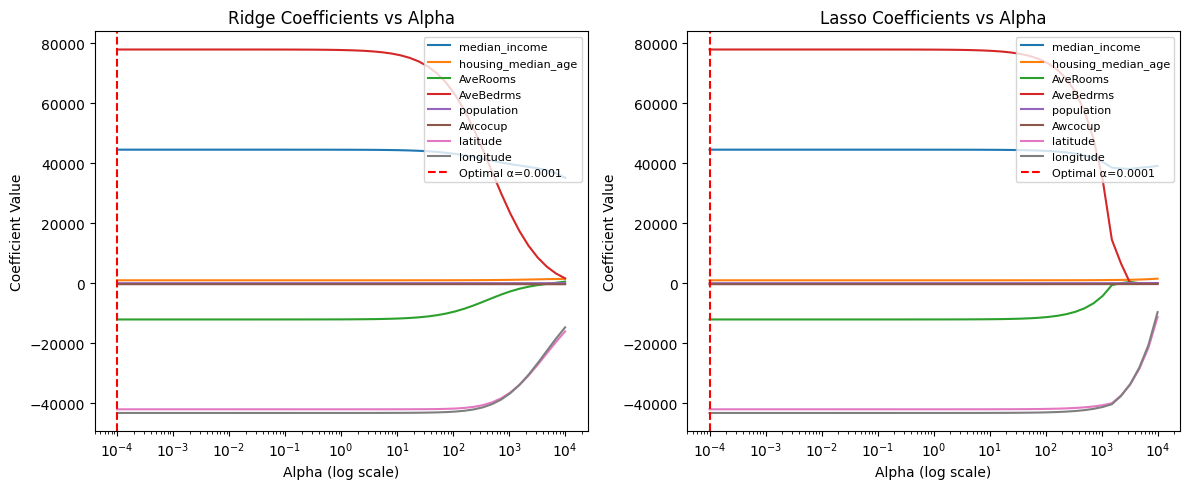

In [7]:
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
for i in range(len(X_train.columns)):
    plt.semilogx(alphas, [coef[i] for coef in ridge_coefs], label=X_train.columns[i])
plt.xlabel('Alpha (log scale)')
plt.ylabel('Coefficient Value')
plt.title('Ridge Coefficients vs Alpha')
plt.axvline(best_ridge_alpha, color='red', linestyle='--', label=f'Optimal α={best_ridge_alpha:.4f}')
plt.legend(loc='best', fontsize=8)

plt.subplot(1, 2, 2)
for i in range(len(X_train.columns)):
    plt.semilogx(alphas, [coef[i] for coef in lasso_coefs], label=X_train.columns[i])
plt.xlabel('Alpha (log scale)')
plt.ylabel('Coefficient Value')
plt.title('Lasso Coefficients vs Alpha')
plt.axvline(best_lasso_alpha, color='red', linestyle='--', label=f'Optimal α={best_lasso_alpha:.4f}')
plt.legend(loc='best', fontsize=8)

plt.tight_layout()
plt.show()


4 Part 2: Classification Task (Breast Cancer)  
4.1 Task 1: Load and Split Dataset  
• Use the Breast Cancer dataset from sklearn.datasets.  
• Treat it as a binary classification task.  
• Split into training (80%) and test (20%) sets.  

In [8]:
from sklearn.datasets import load_breast_cancer

X, y = load_breast_cancer(return_X_y=True)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Training features shape:", X_train.shape)
print("Test features shape:", X_test.shape)


Training features shape: (455, 30)
Test features shape: (114, 30)


4.2 Task 2: Complete all the Task  
• Classification Task (Diabetes):  
– Step 1: Baseline Model (No Regularization) Build a Logistic Regression model without
specifying any regularization (default settings).  
∗ Train the model on the training set.    
∗ Observe the coefficients of the model.  
∗ Compute the accuracy on both training and test sets.  
∗ This step serves as a baseline for comparison and helps to understand the behavior of a standard  
logistic regression model on the dataset.

In [9]:
from sklearn.metrics import accuracy_score

lr = LogisticRegression()
lr.fit(X_train, y_train)

print("Logistic Regression Coefficients:\n", lr.coef_)


y_train_pred = lr.predict(X_train)
y_test_pred = lr.predict(X_test)

print("Accuracy (Train):", accuracy_score(y_train, y_train_pred))
print("Accuracy (Test):", accuracy_score(y_test, y_test_pred))

Logistic Regression Coefficients:
 [[ 1.8416563   0.11604855 -0.1547918   0.00543273 -0.0743871  -0.34630885
  -0.47931489 -0.20711105 -0.11122079 -0.02251289  0.0590639   0.93265271
   0.0940304  -0.0914276  -0.00706797 -0.06780586 -0.09509508 -0.02644827
  -0.02628767 -0.00589681  1.91021386 -0.35314278 -0.10729537 -0.03094047
  -0.13131502 -1.03444074 -1.27978192 -0.37990809 -0.35917677 -0.09721841]]
Accuracy (Train): 0.9560439560439561
Accuracy (Test): 0.956140350877193


– Step 2: Hyperparameter Tuning Use GridSearchCV or RandomizedSearchCV to tune
hyperparameters for logistic regression models with regularization.  
∗ Focus on tuning the C parameter (inverse of regularization strength) and the penalty type
(l1 or l2).  
∗ Run cross-validation on the training set to identify the optimal hyperparameters.  
∗ Evaluate the model performance on the test set using accuracy.  
∗ This step demonstrates the importance of hyperparameter selection for improving model generalization.

In [10]:
param_grid = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100],
    'penalty': ['l1', 'l2'],
    'solver': ['liblinear']
}

logr = LogisticRegression(max_iter=1000)


grid_search = GridSearchCV(logr, param_grid, cv=5, scoring='accuracy')

grid_search.fit(X_train, y_train)

print("Best Parameters:", grid_search.best_params_)
print("Best CV accuracy:", grid_search.best_score_)

best_logreg = grid_search.best_estimator_
y_pred = best_logreg.predict(X_test)
test_accuracy = accuracy_score(y_test, y_pred)

print("Test accuracy:", test_accuracy)

Best Parameters: {'C': 100, 'penalty': 'l1', 'solver': 'liblinear'}
Best CV accuracy: 0.9670329670329672
Test accuracy: 0.9824561403508771


– Step 3: Regularization Experiments (L1 vs L2) Train separate logistic regression models
using L1 (Lasso-like) and L2 (Ridge-like) regularization with the optimal hyperparameters.    
∗ Compare the coefficients for L1 and L2. Observe that L1 tends to produce sparse coefficients
(some exactly zero), whereas L2 shrinks all coefficients but rarely sets them exactly to zero.  
∗ Evaluate and compare accuracy on training and test sets.    
∗ Discuss the effect of regularization on the bias-variance tradeoff:    
· How L1/L2 reduces variance and mitigates overfitting.    
· How overly strong regularization may increase bias, reducing accuracy.  
∗ Optional: Visualize the coefficients or plot accuracy vs C values to better understand the
impact of L1 and L2 regularization.

In [11]:
optimal_l1 = grid_search.best_params_ if grid_search.best_params_['penalty'] == 'l1' else {'C': 1, 'penalty': 'l1'}
optimal_l2 = grid_search.best_params_ if grid_search.best_params_['penalty'] == 'l2' else {'C': 1, 'penalty': 'l2'}

logreg_l1 = LogisticRegression(penalty='l1', C=optimal_l1['C'], solver='liblinear', max_iter=1000)
logreg_l1.fit(X_train, y_train)

logreg_l2 = LogisticRegression(penalty='l2', C=optimal_l2['C'], max_iter=1000)
logreg_l2.fit(X_train, y_train)

LogisticRegression(C=1, max_iter=1000)

In [12]:
C_values = np.logspace(-3, 3, 20)
l1_accuracies = []
l2_accuracies = []


for C in C_values:
    # L1 model
    l1_temp = LogisticRegression(penalty='l1', C=C, solver='liblinear', max_iter=1000)
    l1_temp.fit(X_train, y_train)
    l1_pred = l1_temp.predict(X_test)
    l1_accuracies.append(accuracy_score(y_test, l1_pred))

    # L2 model
    l2_temp = LogisticRegression(penalty='l2', C=C, max_iter=1000)
    l2_temp.fit(X_train, y_train)
    l2_pred = l2_temp.predict(X_test)
    l2_accuracies.append(accuracy_score(y_test, l2_pred))



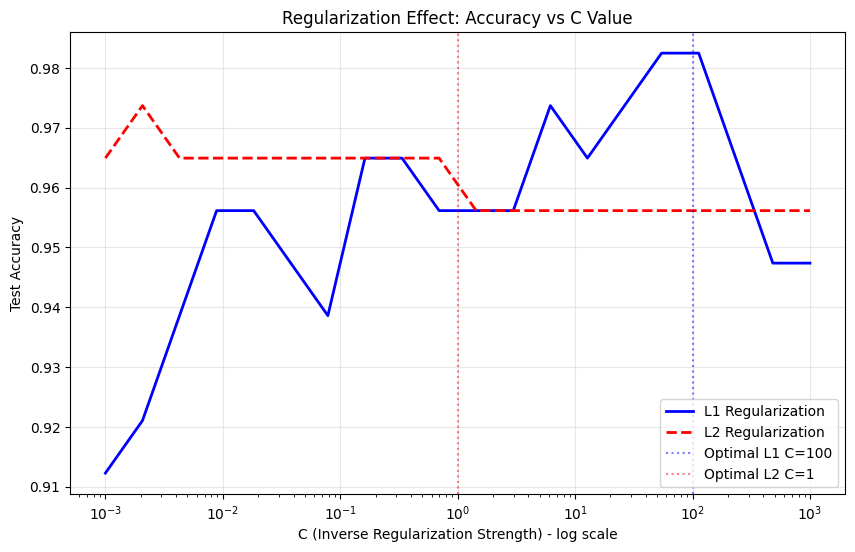

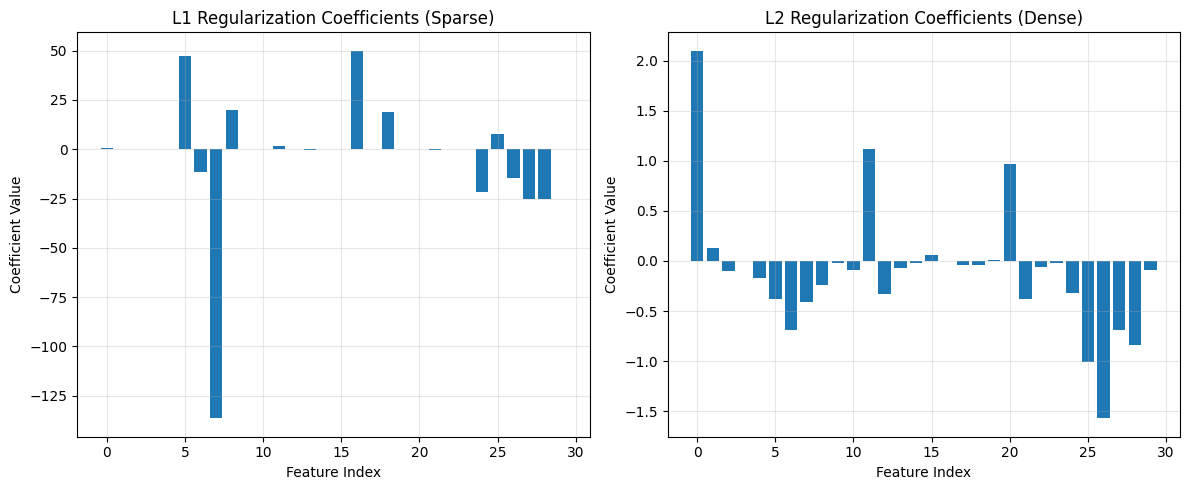

In [13]:
plt.figure(figsize=(10, 6))
plt.semilogx(C_values, l1_accuracies, 'b-', label='L1 Regularization', linewidth=2)
plt.semilogx(C_values, l2_accuracies, 'r--', label='L2 Regularization', linewidth=2)
plt.xlabel('C (Inverse Regularization Strength) - log scale')
plt.ylabel('Test Accuracy')
plt.title('Regularization Effect: Accuracy vs C Value')
plt.axvline(optimal_l1['C'], color='blue', linestyle=':', alpha=0.5, label=f"Optimal L1 C={optimal_l1['C']}")
plt.axvline(optimal_l2['C'], color='red', linestyle=':', alpha=0.5, label=f"Optimal L2 C={optimal_l2['C']}")
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

# Plot coefficients comparison
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.bar(range(len(logreg_l1.coef_[0])), logreg_l1.coef_[0])
plt.xlabel('Feature Index')
plt.ylabel('Coefficient Value')
plt.title('L1 Regularization Coefficients (Sparse)')
plt.grid(True, alpha=0.3)

plt.subplot(1, 2, 2)
plt.bar(range(len(logreg_l2.coef_[0])), logreg_l2.coef_[0])
plt.xlabel('Feature Index')
plt.ylabel('Coefficient Value')
plt.title('L2 Regularization Coefficients (Dense)')
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()
